# Lab 9 Task 3

In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

random_state = 21

digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
pca = PCA(n_components=0.99, svd_solver='full')
digits_pca = pca.fit_transform(digits.data)
print('3.1:', digits_pca.shape[1])

3.1: 41


In [4]:
min_aic = float('inf')
min_aic_n = 0

for n_components in range(50, 250, 10):
    gm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=random_state)
    
    gm.fit(digits_pca)

    if (gm.aic(digits_pca) < min_aic):
        min_aic = gm.aic(digits_pca)
        min_aic_n = n_components

print('3.2:', min_aic_n)

3.2: 160


In [5]:
gm = GaussianMixture(n_components=min_aic_n, covariance_type='full', random_state=random_state)
gm.fit(digits_pca)
samples, _ = gm.sample(100)
print('3.3:', samples[:, 0].mean())

3.3: 0.18933660216142073


3.4:


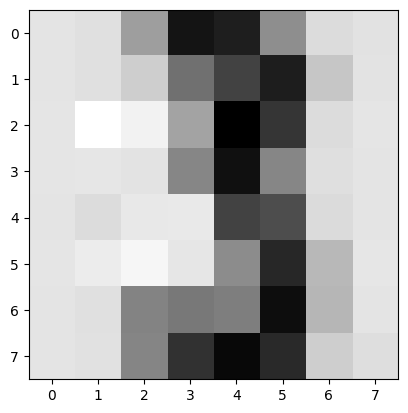

In [6]:
inverse_samples = pca.inverse_transform(samples)
plt.imshow(inverse_samples[5].reshape((8, 8)), cmap='gray_r')
print('3.4:')